# Lecture 8 - Lab 1

## Regression and Function Estimation

Downloads the data from [here](https://course.ccs.neu.edu/cs6220/fall2023/lecture-8/housing_data.txt) and creates some helper functions for the remainder of the lecture.

--2023-11-29 02:42:01--  https://course.ccs.neu.edu/cs6220/fall2023/lecture-8/housing_data.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2500 (2.4K) [text/plain]
Saving to: ‘housing_data.txt’

housing_data.txt    100%[===================>]   2.44K  --.-KB/s    in 0s      

2023-11-29 02:42:02 (101 MB/s) - ‘housing_data.txt’ saved [2500/2500]



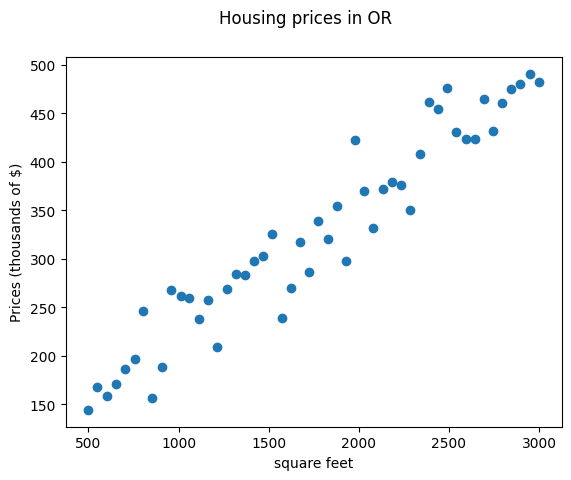

In [1]:
#@title Download Univariate Housing Data (RUN ME)

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

!wget https://course.ccs.neu.edu/cs6220/fall2023/lecture-8/housing_data.txt
housing_data = np.loadtxt("housing_data.txt", delimiter=",")

x = housing_data[0]
y = housing_data[1]

plt.suptitle('Housing prices in OR')
plt.xlabel('square feet')
plt.ylabel('Prices (thousands of $)')
plt.scatter(x,y)

def plotdata(m, b, x=None, y=None):

    if x is None:
        x = np.linspace(500,3000,50) + np.random.randn(50)
    if y is None:
        y = np.linspace(150,480,50) + 30.0*np.random.randn(50)

    x_ = np.linspace(400,3400,1000)

    plt.scatter(x,y)
    plt.suptitle('Housing prices in OR',fontsize=15)
    plt.xlabel('square feet',fontsize=15)
    plt.ylabel('Prices (thousands of $)',fontsize=15)
    plt.plot(x_, fx(m,x_,b), c='r', linewidth=2)

## Forward Prediction Model

Write a function $y = f(x)$ that uses parameters $m$ and $b$ to predict the the price of a house $y$ with square footage $x$ alone. You don't need to solve for $m$ and $b$ just yet. That is, provide a function $y = f_{m,b}(x) = mx + b$, the linear regression.

```
def fx(m, x, b):
  return <YOUR-CODE-HERE>
```

Also write a function for the mean squared error loss function

$$L = \displaystyle\sum_{n=1}^N (y^{(n)} - (mx^{(n)} + b))^2$$

where $n$ denotes the $n^{th}$ instance of the data point tuple $(x^{(n)}, y^{(n)})$, and $m$ and $b$ are parameters.

```
def mse_loss(x, y, m, b):
  return <YOUR-CODE-HERE>
```

In [2]:
import numpy as np

def fx(m, x, b):
    return m * x + b

def mse_loss(x, y, m, b):
    predictions = fx(m, np.array(x), b)
    return np.mean((np.array(y) - predictions) ** 2)



## Plot the Optimization Space

In [3]:
m = np.linspace(-5,10,100)
b = np.linspace(-2600,400,100)
L = [[  mse_loss(x, y, mi, bi) for mi in m ] for bi in b ]
L = np.array(L)

# Create the axes
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

M,B=np.meshgrid(m,b)
ax.plot_wireframe(M, B, L, rstride=2, cstride=2)


ax.set_xlabel('m (slope)')
ax.set_ylabel('b (intercept)')
ax.set_zlabel('L(x,y,m,b)')

Text(0.5, 0, 'L(x,y,m,b)')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Loss as a function of intercept')

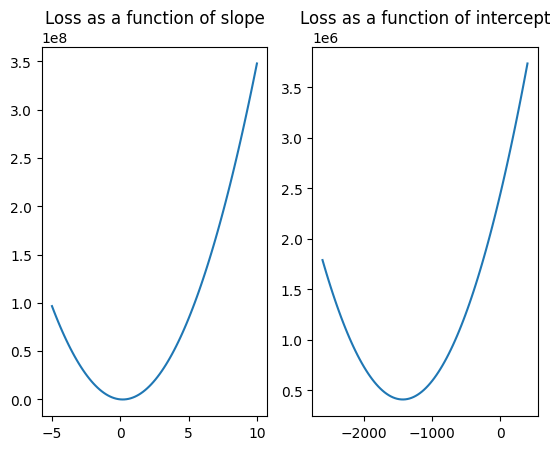

In [4]:
figure, axis = plt.subplots(1,2)

L = [ mse_loss(x, y, mi, 0) for mi in m ]
axis[0].plot(m, L)
axis[0].set_title("Loss as a function of slope")

L = [ mse_loss(x, y, 1, bi) for bi in b ]
axis[1].plot(b, L)
axis[1].set_title("Loss as a function of intercept")

# Lecture 8 - Lab 2

In this section, we'll implement gradient descent. Recall that the parameters $m$ and $b$ are used to optimize the following cost function:

$$ L = \sum_i (y^{(i)} - (mx^{(i)} + b))^2 $$

Here, $(x^{(i)}, y^{(i)})$ is the $i^{th}$ sample in the data.

## Gradient Descent

Write functions for gradient of the loss function $L$ with respect to $m$ and $b$. That is, write:

$$\nabla_m L(m,b)$$

$$\nabla_b L(m, b)$$

You should have the equations from your derivation above. (Don't set to zero.)

$$\nabla_m L = \sum_i -2x^{(i)} ( y^{(i)} - (mx^{(i)} + b) )$$

$$\nabla_b L = \sum_i - ( y^{(i)} - (mx^{(i)} + b) ) $$


In [5]:
#@title Calculate the gradients with respect to $m$ and $b$

# Derivative of the loss function with respect to m
def deriv_m(x, y, m, b):
    return (-2 * x * (y - fx(m, x, b))).sum()

# Derivative of the loss function with respect to b
def deriv_b(x, y, m, b):
    return - (y - fx(m, x, b)).sum()


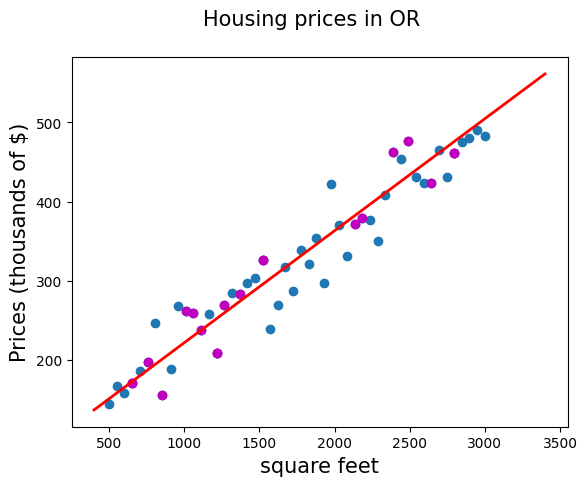

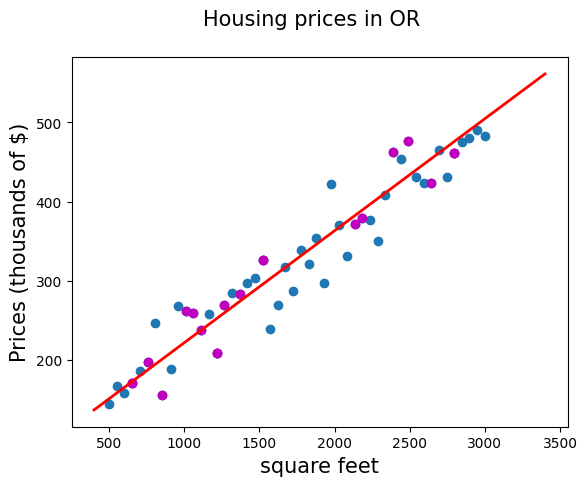

In [6]:
#@title Run the Stochastic Batch Gradient Descent Algorithm

from IPython import display
import time

# Randomly initialize
m = np.random.randn(1) / 2.0
b = np.float32( np.random.randint(-100, 100 ) )
print (m, b)

batchsize = 20              #@param
mrate = 5e-9                #@param
brate = 1e-4                #@param
iterations = 50             #@param

N = x.shape[0]
objective = np.zeros( iterations )
for i in range(0, iterations):

    randombatch = np.random.randint(0, N, batchsize)

    # Choose a random batch to optimize with
    xb = x[ randombatch ]
    yb = y[ randombatch ]

     # Calculate the gradient and scale by the learning rate
    m_update = mrate * deriv_m(xb, yb, m, b)
    b_update = brate * deriv_b(xb, yb, m, b)

    # Take a step in the direction of the gradient
    m = m - m_update
    b = b - b_update

    # Calculate the loss function
    objective[i] = mse_loss(x, y, m, b)

    plt.clf()
    plotdata( m, b, x, y )
    plt.scatter(xb,yb,c='m')
    print("(dm=%f,db=%f),(m,b)=(%f,%f),L=%f"%(m_update,b_update,m,b,objective[i]))


    # ch = raw_input()
    display.clear_output(wait=True)
    display.display(plt.gcf())

    time.sleep(1.0)


What's the predicted price based on a parameterized linear regression solved through maximum likelihood of a house at 1750 square feet?

In [ ]:
fx(1750, m, b)

array([306.17834132])

# Lecture 8 - Lab 3

## MNIST



In [7]:
#@title Get the Data and Utility Functions

!mkdir data
!wget -O data/train-images-idx3-ubyte.gz http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget -O data/train-labels-idx1-ubyte.gz http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget -O data/t10k-images-idx3-ubyte.gz http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget -O data/t10k-labels-idx1-ubyte.gz http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
!gunzip data/*

!wget https://course.ccs.neu.edu/cs6220/fall2023lecture-labs/lecture-8/mnistutil.py

--2023-11-29 02:50:31--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘data/train-images-idx3-ubyte.gz’

data/train-images-i 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2023-11-29 02:50:32 (70.9 MB/s) - ‘data/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-11-29 02:50:32--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘data/train-labels-idx1-ubyte.gz’

data/train-labels-i 1

In [ ]:
#@title RUN ME

import numpy as np
import matplotlib.pyplot as plt
from struct import unpack


def loadmnist(imagefile, labelfile):
    '''Gist Code
    Code taken from Gist:
    https://gist.github.com/mGalarnyk/aa79813d7ecb0049c7b926d53f588ae1
    '''

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def showimage(image):
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

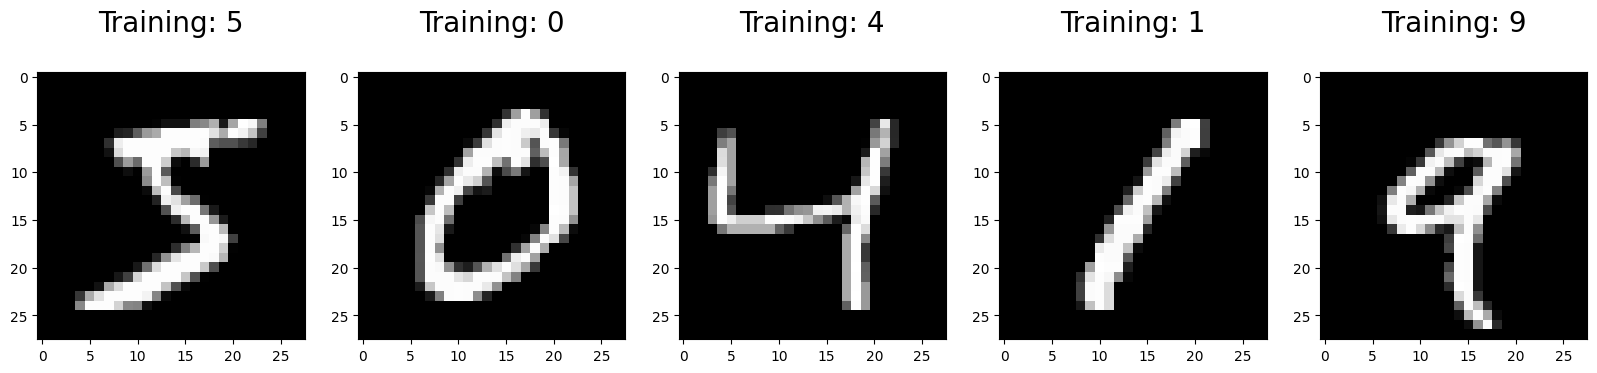

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from mnistutil import loadmnist, showimage

train_img, train_lbl = loadmnist('data/train-images-idx3-ubyte'
                                 , 'data/train-labels-idx1-ubyte')
test_img, test_lbl = loadmnist('data/t10k-images-idx3-ubyte'
                               , 'data/t10k-labels-idx1-ubyte')

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
whos

Variable       Type                          Data/Info
------------------------------------------------------
Axes3D         type                          <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
B              ndarray                       100x100: 10000 elems, type `float64`, 80000 bytes
L              list                          n=100
M              ndarray                       100x100: 10000 elems, type `float64`, 80000 bytes
N              int                           50
ax             Axes3D                        Axes3D(0,0;1x1)
axis           ndarray                       2: 2 elems, type `object`, 16 bytes
b              float64                       -19.608560591392692
b_update       float64                       -0.044538502432964214
batchsize      int                           20
brate          float                         0.0001
deriv_b        function                      <function deriv_b at 0x78715268edd0>
deriv_m        function                      <function 

## Logistic Regression

Note the following terminology:

* $m$ number of labels
* $d$ number of features (feature dimension)
* $N$ number of data points (samples). Could be in batch or in overall data.
* $\textbf{x}$ is the input features
* $\textbf{y}$ is the output labels

## Sigmoid Function
The sigmoid function is defined as

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$


## Gradient of the Sigmoid Function
The gradient of the sigmoid function is written:

$$\nabla_z \sigma(z) = \sigma(z) \cdot (1 - \sigma(z))$$

Note the above uses element wise multiplication.


In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradsigmoid(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

Play around with the sigmoid function. Instead of using $x$, try $mx + b$. What happens if you change $b$? How about $m$?

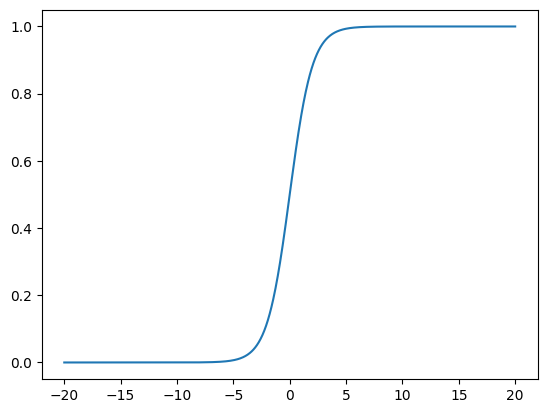

In [ ]:
x = np.linspace(-20, 20, 1000)
plt.plot( x, sigmoid(x) )

## Logistic Regression Inference
Logistic regression uses this function:

$$\hat{\textbf{y}} = \sigma ( W \textbf{x} + \textbf{b} )$$

The parameters that you need to optimize for are $W \in \mathbb{R}^{m \times d}$, a matrix of size $m \times d$ and $b \in \mathbb{R}^{m}$, a vector of size $m$.

In [10]:
def logreg(W, x, b):
    return sigmoid((W @ x.T).T + b)



## Cross-Entropy Cost Function

Cross-Entropy Cost Function is defined as:

$$L( \{(\textbf{x}, \textbf{y}) \}, W, \textbf{b}) = - \sum_i \textbf{y}^{(i)T} \log \hat{\textbf{y}}^{(i)} + (1 - \textbf{y})^{(i) T} \log (1 - \hat{\textbf{y}}^{(i)})$$

Here,

$$\hat{\textbf{y}} = \sigma ( W \textbf{x} + \textbf{b} )$$

which is the logistic regression previously defined.

## Some Linear Algebra (and Python)

Note in the equation $\textbf{y}^T \log( \hat{\textbf{y}} )$. This is a horizontal vector matrix multiplied with a vertical vector, which gives a scalar. That is, it's

$$\mathbb{R}^{1 \times m} \times \mathbb{R}^{m \times 1} = \mathbb{R}$$

where $\mathbb{R}$ is a scalar. If we're treating $y$ as a single vector (i.e., a single sample in the dataset), then you could write in Python the following:

```python
for n in range(N):
  A[n] = Y[n].T @ Yhat[n]
```

In Python, if using a data matrix where $Y \in \mathbb{R}^{N \times m}$ (rather than just a vector $\textbf{y} \in \mathbb{R}^{m \times 1}$), you would write

```python
A = (Y * Yhat).sum(axis = 1)
```

This achieves the same matrix as the above. If you're summing all the results together, then

```
for n in range(N)
  A += Y[n].T @ Yhat[n]
```

is equivalent to

```
A = (Y * Yhat).sum()
```


## Gradient of Cross-Entropy with respect to $W$

$$\nabla_W L =  \sum_i \left( \sigma ( W \textbf{x}^{(i)} + \textbf{b} ) - \textbf{y}^{(i)} \right) \textbf{x}^{(i) T}$$

This should yield a matrix $\mathbb{R}^{m \times d}$, where $m$ is the length of a label and $d$ is the length of a feature vector. If $\hat{\textbf{y}}$ is the prediction, then

$$\nabla_W L =  \sum_i \left( \hat{\textbf{y}}^{(i)} - \textbf{y}^{(i)} \right) \textbf{x}^{(i) T}$$

## Gradient of Cross-Entropy with respect to $b$

$$\nabla_b L =  \sum_i \left( \sigma ( W \textbf{x}^{(i)} + \textbf{b} ) - \textbf{y}^{(i)} \right)$$

This should yield a matrix $\mathbb{R}^{m}$, where $m$ is the length of a label. If $\hat{\textbf{y}}$ is the prediction, then

$$\nabla_b L =  \sum_i \left( \hat{\textbf{y}}^{(i)} - \textbf{y}^{(i)} \right)$$

## Naming convention of dimensions

* $N$ is the number of data samples (or batch size)
* $m$ is the number of labels
* $d$ is the number of features
* $W$ is the weight matrix of size $m \times d$
* $b$ is the offset vector of size $m$

In [12]:
def logreg(W, x, b):
    return sigmoid((W @ x.T).T + b)

def costfxn(y, W, x, b):
    yhat = logreg(W, x, b)
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

def gradW(y, W, x, b):
    yhat = logreg(W, x, b)
    return (np.expand_dims(yhat - y, axis=2) * np.expand_dims(x, axis=1)).sum(axis=0)

def gradb(y, W, x, b):
    yhat = logreg(W, x, b)
    return (yhat - y).sum(axis=0)

## Optimize with Gradient Descent

This is the main loop that utilizes your functions that you've defined and have written above.

Text(0, 0.5, 'Loss Value')

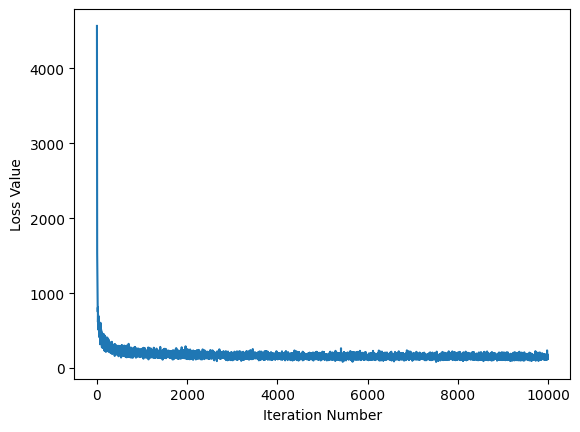

In [ ]:
# Parameters
num_iters = 1000
batch_size = 256
num_labels = 10
num_features = 784
learn_rate = 0.005
random_range = np.random.default_rng(60000)
index_offset = (np.linspace(0,batch_size-1,batch_size)*10).astype(int) # Offset translation from label to one-hot encoding


# Randomly initialize
W = np.random.randn(num_labels, num_features)
b = np.random.randn(num_labels)

# Preprocess the training data to fall between 0 and 1
train_data = train_img / 255.0

# Iterate through num_iters
L = []
for i in range(num_iters):

  # Take a random training sample
  rand_sample = random_range.integers(low=0, high=60000, size=batch_size)

  # Features
  xtrain_batch = train_data[rand_sample]

  # Calculate the labels
  ytrain_batch = np.zeros((batch_size, num_labels))
  ytrain_label = train_lbl[rand_sample]
  index_ones = index_offset + ytrain_label
  ytrain_batch.reshape(batch_size*num_labels)[index_ones] = 1
  # What the above is doing in for loop
  # for i in range(batch_size):
  #   ytrain_batch[i, ytrain_label[i]] = 1

  # Calculate cost function and the gradient
  W -= learn_rate * gradW(ytrain_batch, W, xtrain_batch, b)
  b -= learn_rate * gradb(ytrain_batch, W, xtrain_batch, b)

  L.append(costfxn(ytrain_batch, W, xtrain_batch, b))

yhat = logreg(W, xtrain_batch, b)
plt.plot(L)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')

## Infer on test set

Automatic pdb calling has been turned ON
Sample:  7721 , True Label:  6


<StemContainer object of 3 artists>

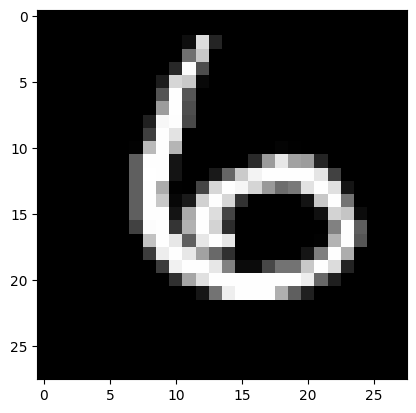

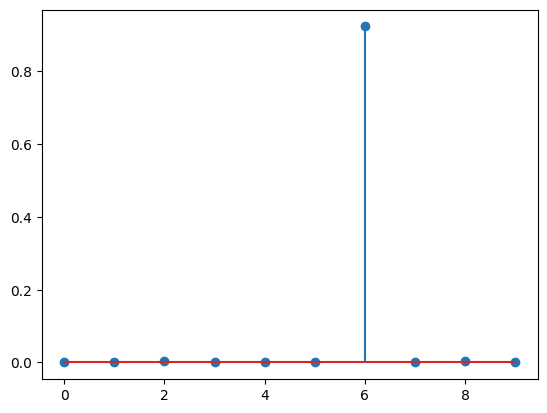

In [ ]:
%pdb
try_image = np.random.randint(0, 10000) #@param

showimage(test_img[try_image])
print("Sample: ", try_image, ", True Label: ", test_lbl[try_image])


plt.figure()
plt.stem(logreg(W, test_img[try_image]/255.0, b))


# Lecture 8 - Lab 4

## Using the Keras Toolbox

You can download this exact example code from the Tensorflow / Keras website, showing you how to run Keras, a deep neural network toolbox that is used in industry today. It's plug and play, and you can immediately use it.

### Your task

 1. Adapt the following code so that it solves with a **logistic regression**.

 2. Compare against deep neural network architectures (e.g., with/without convolutions, etc.)

In [14]:
#< Adapt FROM https://keras.io/examples/vision/mnist_convnet/ >
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

input_dim = 1000

model = Sequential()
model.add(Dense(1, input_dim=input_dim, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 1001 (3.91 KB)
Trainable params: 1001 (3.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
